## Loading The DataSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive//Assignment\ Part\ I /content/

## Import Necessary Modules

In [ ]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
# Change the import statement below
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator from tensorflow.keras

In [ ]:
dataset_path = "/content/Assignment Part I/Insect Classification"
train_path = "/content/Assignment Part I/Insect Classification/train"
test_path = "/content/Assignment Part I/Insect Classification/test"

## Data Preprocessing

In [ ]:
# List only directories (ignore non-directory files like .ipynb)
class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Count total number of classes
num_classes = len(class_names)

# Print the structure of the dataset
print(f"Dataset Path: {dataset_path}")
print(f"Number of Classes: {num_classes}")
print("Classes:", class_names)

Dataset Path: /content/Assignment Part I/Insect Classification
Number of Classes: 2
Classes: ['test', 'train']


In [ ]:
# List only directories (ignore non-directory files like .ipynb)
class_names = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]

# Count total number of classes
num_classes = len(class_names)

# Print the structure of the dataset
print(f"Dataset Path: {dataset_path}")
print(f"Number of Classes: {num_classes}")
print("Classes:", class_names)

Dataset Path: /content/Assignment Part I/Insect Classification
Number of Classes: 9
Classes: ['beetle', 'bollworm', 'grasshopper', 'armyworm', 'aphids', 'mites', 'sawfly', 'mosquito', 'stem_borer']


In [ ]:
# Define the base path
base_path = train_path


subdirs = ['sawfly', 'aphids', 'armyworm', 'mites', 'beetle', 'mosquito', 'stem_borer', 'grasshopper', 'bollworm']

In [ ]:
import os
import numpy as np
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array

# Path to training dataset
train_path = "/content/Assignment Part I/Insect Classification/train"

# Define the target image size
image_size = (80, 80)

# Initialize data containers
image_data = []
class_labels = []
corrupted_images = []

# Get class names (folder names)
class_names = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]

# Allowed image extensions
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')

# Loop through each class folder
for idx, class_name in enumerate(class_names):
    full_class_path = os.path.join(train_path, class_name)

    # Loop through each image file in the class folder
    for filename in os.listdir(full_class_path):
        if not filename.lower().endswith(valid_extensions):
            continue  # skip non-image files

        image_path = os.path.join(full_class_path, filename)

        try:
            # Load and resize image
            image = load_img(image_path, target_size=image_size)
            image_array = img_to_array(image)

            # Store the image and label
            image_data.append(image_array)
            class_labels.append(idx)
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            corrupted_images.append(image_path)

# Convert lists to numpy arrays
X_data = np.array(image_data, dtype='float32')
y_labels = np.array(class_labels)

# Summary
print(f"\n Loaded {len(X_data)} images.")
print(f" Corrupted images: {len(corrupted_images)}")
print("Classes:", class_names)



 Loaded 2111 images.
 Corrupted images: 0
Classes: ['beetle', 'bollworm', 'grasshopper', 'armyworm', 'aphids', 'mites', 'sawfly', 'mosquito', 'stem_borer']


In [ ]:
import os

# Delete each corrupted image file
for path in corrupted_images:
    try:
        os.remove(path)
        print(f" Deleted: {path}")
    except Exception as e:
        print(f" Failed to delete {path}: {e}")

In [ ]:
# Print the number of images in the dataset
print("Number of images:", len(X_data))

# Print the shape of the images in the dataset
print("Shape of images:", X_data.shape)

# Print the number of classes in the dataset
print("Number of classes:", len(class_names))

# Print the names of the classes in the dataset
print("Class names:", class_names)

Number of images: 2111
Shape of images: (2111, 80, 80, 3)
Number of classes: 9
Class names: ['beetle', 'bollworm', 'grasshopper', 'armyworm', 'aphids', 'mites', 'sawfly', 'mosquito', 'stem_borer']


In [ ]:
import os

# Path to training dataset
train_path = "/content/Assignment Part I/Insect Classification/train"

# List of valid image extensions
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')

# Dictionary to hold class-wise image counts
class_image_counts = {}

# Loop through each class folder
for class_name in os.listdir(train_path):
    class_folder = os.path.join(train_path, class_name)

    if os.path.isdir(class_folder):
        # Count only valid image files
        image_count = len([
            file for file in os.listdir(class_folder)
            if file.lower().endswith(valid_extensions)
        ])
        class_image_counts[class_name] = image_count

# Display the image count for each class
for class_name, count in class_image_counts.items():
    print(f"{class_name}: {count} images")


beetle: 277 images
bollworm: 231 images
grasshopper: 264 images
armyworm: 210 images
aphids: 254 images
mites: 240 images
sawfly: 186 images
mosquito: 281 images
stem_borer: 168 images


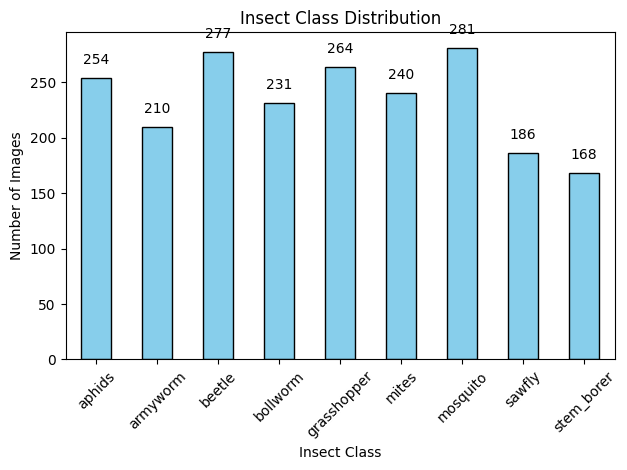

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a label mapping dictionary from index to class name
label_mapping = {i: name for i, name in enumerate(class_names)}

# Create a DataFrame from the integer labels
df = pd.DataFrame({"label": y_labels})

# Map the labels to class names using the label_mapping dictionary
df['label'] = df['label'].map(label_mapping)

# Create a bar plot of the class distribution
ax = df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Add text labels to the bars
for i, count in enumerate(df['label'].value_counts().sort_index()):
    ax.text(i, count + 10, str(count), ha='center', va='bottom')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("Insect Class")
plt.ylabel("Number of Images")
plt.title("Insect Class Distribution")

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import os
from PIL import Image

# Base dataset path (can be train or test)
dataset_path = "/content/Assignment Part I/Insect Classification/train"

# Track corrupted image paths
corrupted_images = []

# Loop through each class folder
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            try:
                # Try to open and load the image
                with Image.open(file_path) as img:
                    img.verify()  # Verify image file integrity
            except Exception as e:
                print(f" Corrupted: {file_path} ({e})")
                corrupted_images.append(file_path)



In [ ]:
# Delete corrupted images
for image_path in corrupted_images:
    try:
        os.remove(image_path)
        print(f" Removed: {image_path}")
    except Exception as e:
        print(f" Error removing {image_path}: {e}")

print(f"\n Done. Total corrupted images removed: {len(corrupted_images)}")



 Done. Total corrupted images removed: 0


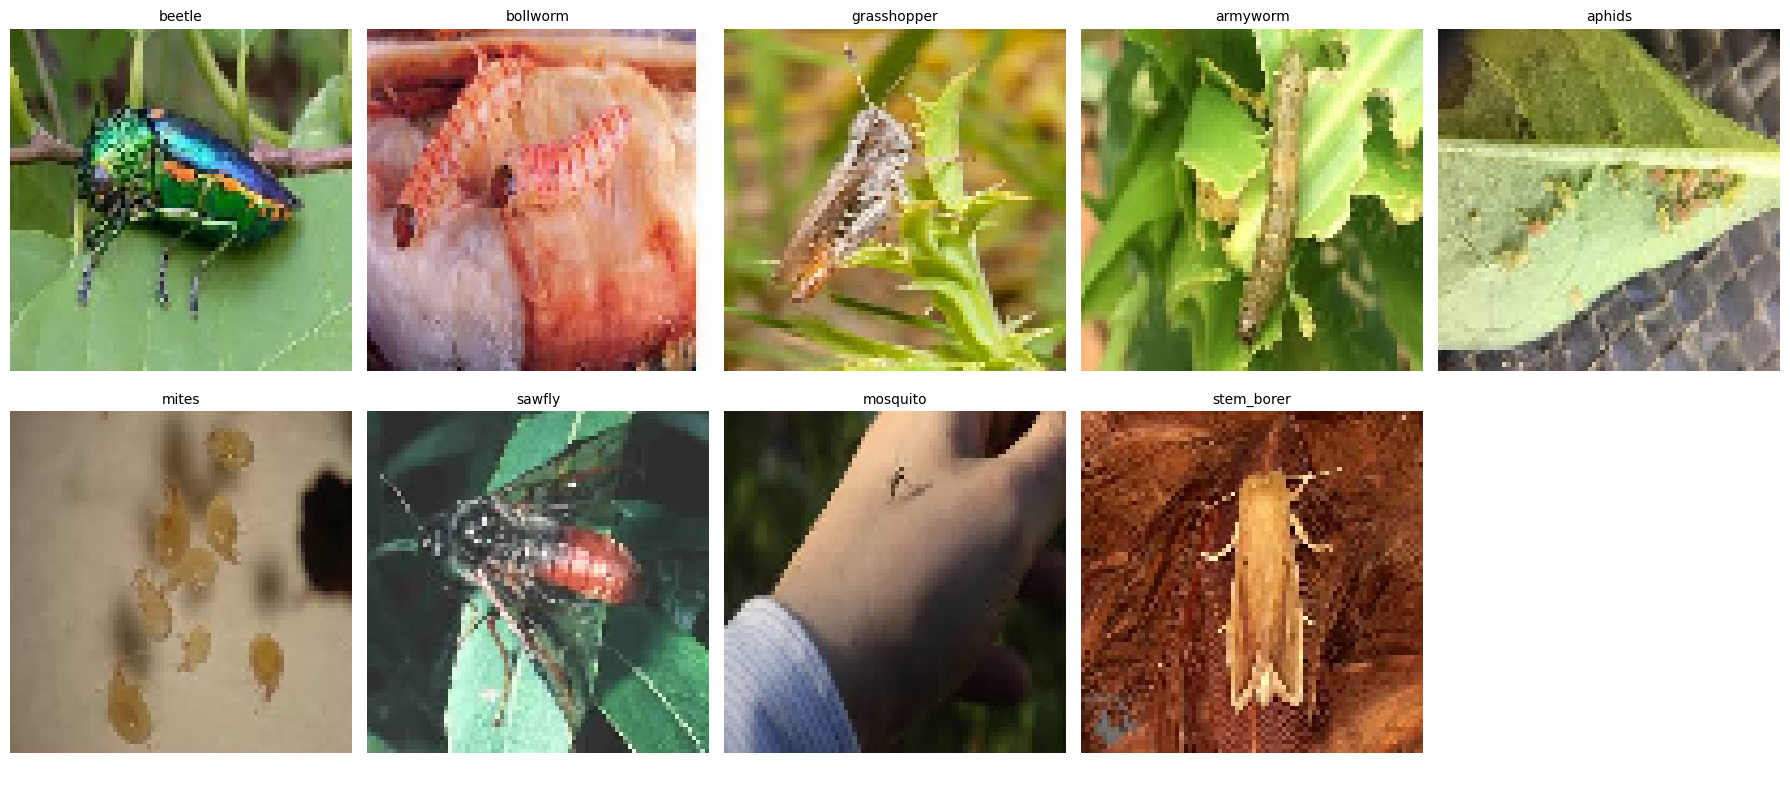

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 2 rows: first row with 5 images, second row with 4
fig, axes = plt.subplots(2, 5, figsize=(18, 8))

# Flatten the axes for easy indexing
axes = axes.flatten()

# Loop through each class and display one image
for i, class_name in enumerate(class_names):
    # Get all indices where the class label matches
    class_indices = np.where(y_labels == i)[0]

    # Choose a random index for this class
    idx = np.random.choice(class_indices)

    # Show the image
    axes[i].imshow(X_data[idx].astype(np.uint8))
    axes[i].set_title(class_name, fontsize=10)
    axes[i].axis("off")

# Turn off the unused subplot (last one in case only 9 classes)
if len(class_names) < len(axes):
    for j in range(len(class_names), len(axes)):
        axes[j].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
base_path = "/content/Assignment Part I/Insect Classification/train"

# Define the directory for each insect class dataset
sawfly_directory = os.path.join(base_path, "sawfly")
aphids_directory = os.path.join(base_path, "aphids")
armyworm_directory = os.path.join(base_path, "armyworm")
mites_directory = os.path.join(base_path, "mites")
beetle_directory = os.path.join(base_path, "beetle")
mosquito_directory = os.path.join(base_path, "mosquito")
stem_borer_directory = os.path.join(base_path, "stem_borer")
grasshopper_directory = os.path.join(base_path, "grasshopper")
bollworm_directory = os.path.join(base_path, "bollworm")

In [ ]:
import os
from keras.preprocessing.image import load_img, img_to_array

# Define the directory for a specific insect class (e.g., sawfly)
image_path = os.path.join(sawfly_directory, 'jpg_1 - Copy (4).jpg')

# Load the image
img = load_img(image_path)

# Convert the image to an array
x = img_to_array(img)

# Reshape the array to have a batch size of 1
x = x.reshape((1,) + x.shape)

# Print the shape of the reshaped array
print('Shape of image:', x.shape)

Shape of image: (1, 225, 225, 3)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os

# # Set up the ImageDataGenerator with your augmentation parameters
# datagen = ImageDataGenerator(
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     rotation_range=10,
#     fill_mode='nearest'
# )

# # Load an image to test the generator (replace with any image path)
# image_path = os.path.join(sawfly_directory, '250px-Dolerus_nitens.jpg')  # Replace with an actual image
# img = load_img(image_path)  # Load the image
# x = img_to_array(img)  # Convert image to numpy array

# # Reshape the array to have a batch size of 1
# x = x.reshape((1,) + x.shape)

# # Create the target directory for saving augmented images
# output_directory = '/content/augmented_images'
# if not os.path.exists(output_directory):
#     os.makedirs(output_directory)

# # Create a batch of augmented images from the input image
# i = 0
# for batch in datagen.flow(x, batch_size=1, save_to_dir=output_directory, save_prefix='aug', save_format='jpg'):
#     i += 1
#     if i > 20:  # Generate 20 augmented images
#         break

## Image Augmentation

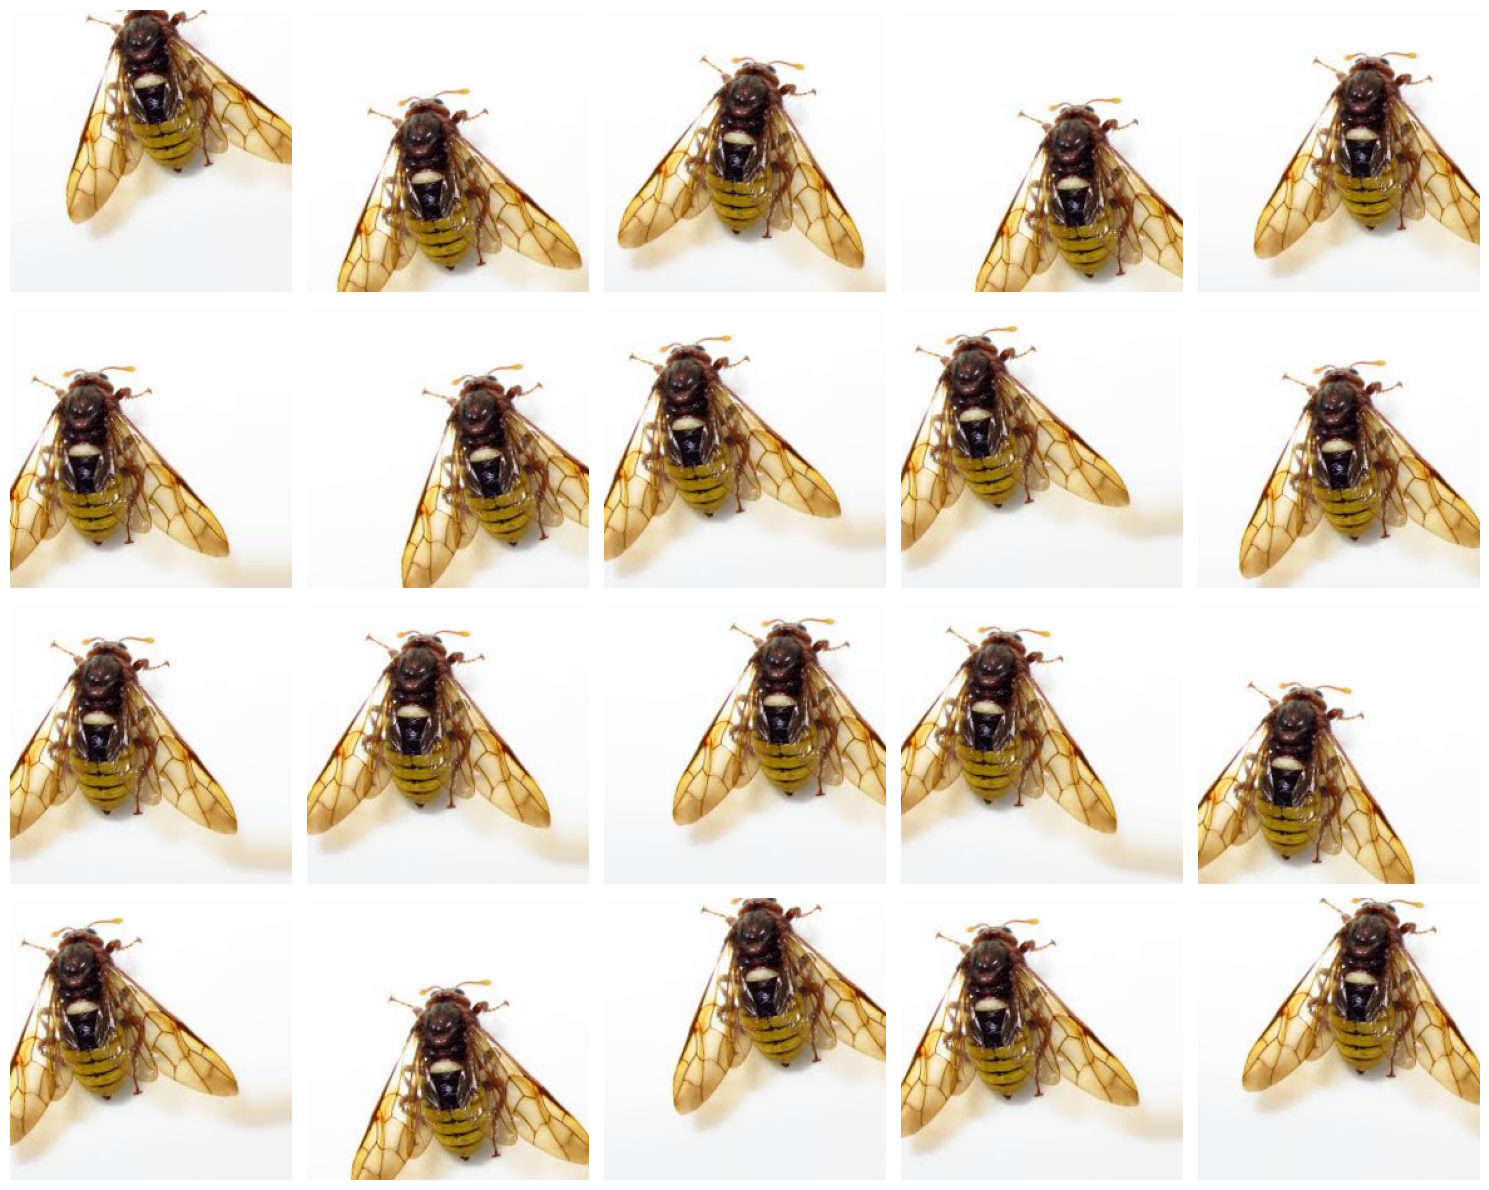

In [ ]:
import matplotlib.pyplot as plt


# Set up the ImageDataGenerator with your augmentation parameters
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    rotation_range=10,
    fill_mode='nearest'
)

# Load an image to test the generator (replace with any image path)
image_path = os.path.join(sawfly_directory, 'jpg_1 - Copy (4).jpg')  # Replace with an actual image
img = load_img(image_path)  # Load the image
x = img_to_array(img)  # Convert image to numpy array

# Reshape the array to have a batch size of 1
x = x.reshape((1,) + x.shape)

# Create a grid of 5 columns and 4 rows to visualize the augmented images
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12))

# Generate and display augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    ax = axes[i // 5, i % 5]  # Determine the row and column of the subplot
    ax.imshow(batch[0].astype('uint8'))  # Show the image
    ax.axis('off')  # Hide axes
    i += 1
    if i >= 20:  # Generate and display 20 images
        break

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
import os
import cv2

# Define the base path where the insect images are stored
base_path = "/content/Assignment Part I/Insect Classification/train"

# Initialize empty lists to store the image data and labels
image_data = []
image_labels = []

# Set the input dimension and image dimensions (resize all images to 80x80)
input_dimension = 80
image_dimensions = (input_dimension, input_dimension)

# Loop over each insect class folder (e.g., sawfly, aphids, etc.) inside the base path
for class_folder in os.listdir(base_path):

    class_folder_path = os.path.join(base_path, class_folder)

    # Skip non-directory files
    if not os.path.isdir(class_folder_path):
        continue

    # Loop over all image files in each class folder
    for image_file in os.listdir(class_folder_path):

        # Check if the image file has a .jpeg, .jpg, or .png extension
        if image_file.endswith((".jpeg", ".jpg", ".png")):

            # Construct the image path
            image_path = os.path.join(class_folder_path, image_file)

            # Read the image from the image path
            image = cv2.imread(image_path)

            # Resize the image to the specified image dimensions (80x80)
            image = cv2.resize(image, image_dimensions)

            # Append the image data and the corresponding label (class folder name)
            image_data.append(image)
            image_labels.append(class_folder)

# Convert image_data and image_labels to numpy arrays for further processing
import numpy as np
image_data = np.array(image_data)
image_labels = np.array(image_labels)

# Print the shape of the image data to check the number of images and their dimensions
print(f"Image Data Shape: {image_data.shape}")
print(f"Image Labels Shape: {image_labels.shape}")


Image Data Shape: (2111, 80, 80, 3)
Image Labels Shape: (2111,)


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming image_data and image_labels have been populated as per previous steps
imgs = np.array(image_data)  # Convert image_data to a numpy array
labels = np.array(image_labels)  # Convert image_labels to a numpy array

# Set the number of augmentation rounds (how many batches you want to generate)
augmentation_rounds = 40

# Define the image augmentation generator
augmentor = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                               rotation_range=10, fill_mode='nearest')

# Fit the augmentor to the image data
augmentor.fit(imgs)

augmented_images = []
augmented_labels = []

# Generate augmented images and labels using the augmentation generator
for image_batch, label_batch in augmentor.flow(imgs, labels, batch_size=32):
    augmented_images.append(image_batch)
    augmented_labels.append(label_batch)
    if len(augmented_images) >= augmentation_rounds:
        break

# Concatenate the original and augmented images and labels
images_data = np.concatenate((imgs, np.concatenate(augmented_images)))
labels = np.concatenate((labels, np.concatenate(augmented_labels)))

# Print the shapes of the combined images and labels
print(f"Combined images shape: {images_data.shape}")
print(f"Combined labels shape: {labels.shape}")

# Create a DataFrame to see the label distribution
label_dataframe = pd.DataFrame({"label": labels})

# Print the label distribution
print("Label distribution:")
print(label_dataframe["label"].value_counts())


Combined images shape: (3391, 80, 80, 3)
Combined labels shape: (3391,)
Label distribution:
label
mosquito       455
beetle         441
grasshopper    431
aphids         407
mites          387
bollworm       378
armyworm       334
sawfly         293
stem_borer     265
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_data, labels, test_size=0.2, random_state=42)


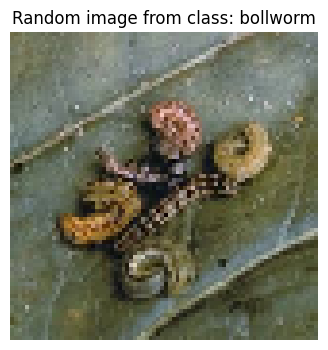

In [ ]:
# prompt: for showing random image from a random class

import matplotlib.pyplot as plt
import numpy as np
def show_random_image_from_random_class(X_data, y_labels, class_names):
    """
    Displays a random image from a randomly selected class.

    Args:
        X_data (np.ndarray): Array of image data.
        y_labels (np.ndarray): Array of integer labels.
        class_names (list): List of class names corresponding to integer labels.
    """
    # Select a random class index
    random_class_index = random.choice(range(len(class_names)))

    # Get the name of the randomly selected class
    random_class_name = class_names[random_class_index]

    # Find all indices where the class label matches the random class index
    class_indices = np.where(y_labels == random_class_index)[0]

    # If there are images for this class, select a random image
    if len(class_indices) > 0:
        random_image_index = random.choice(class_indices)
        random_image = X_data[random_image_index]

        # Display the image
        plt.figure(figsize=(4, 4))
        # Ensure image is in the correct format for display (uint8)
        plt.imshow(random_image.astype(np.uint8))
        plt.title(f"Random image from class: {random_class_name}")
        plt.axis("off")
        plt.show()
    else:
        print(f"No images found for class: {random_class_name}")

# Call the function to display a random image from a random class
show_random_image_from_random_class(X_data, y_labels, class_names)

In [ ]:
# Print the shapes of the training images and labels
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

# Create a DataFrame to display the training label distribution
train_df = pd.DataFrame({"label": y_train})
print("Training label distribution:")
print(train_df['label'].value_counts())
print("")  # Add a blank line for better readability

# Print the shapes of the test images and labels
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Create a DataFrame to display the test label distribution
test_df = pd.DataFrame({"test_labels": y_test})

# Print the test label distribution
print("Test label distribution:")
print(test_df['test_labels'].value_counts())

X_train shape: (2712, 80, 80, 3)
y_train shape: (2712,)
Training label distribution:
label
mosquito       376
grasshopper    348
beetle         337
aphids         334
mites          313
bollworm       294
armyworm       269
sawfly         233
stem_borer     208
Name: count, dtype: int64

X_test shape: (679, 80, 80, 3)
y_test shape: (679,)
Test label distribution:
test_labels
beetle         104
bollworm        84
grasshopper     83
mosquito        79
mites           74
aphids          73
armyworm        65
sawfly          60
stem_borer      57
Name: count, dtype: int64


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.utils import to_categorical

# # Initialize the label encoder
# le = LabelEncoder()

# # Encode the labels for training and test data
# y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test)  # Use transform here to avoid fitting again

# # Convert the labels to one-hot encoding
# num_classes = len(np.unique(y_train))  # Dynamically get the number of classes
# y_train_one_hot = to_categorical(y_train, num_classes=9)
# y_test_one_hot = to_categorical(y_test, num_classes=9)

# # Optionally, print the encoded labels and their one-hot representation
# print(f"Encoded y_train: {y_train[:10]}")  # Print the first 10 encoded labels
# print(f"One-hot y_train: {y_train_one_hot[:10]}")  # Print the first 10 one-hot encoded labels


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# List of class names in desired order (optional if already in labels)
class_names = ['sawfly', 'aphids', 'armyworm', 'mites', 'beetle', 'mosquito', 'stem_borer', 'grasshopper', 'bollworm']

# Convert y_train and y_test to numpy arrays (if they aren’t already)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Initialize label encoder
le = LabelEncoder()

# Fit label encoder using full list of class names (ensures consistent mapping)
le.fit(class_names)

# Transform the labels
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# One-hot encode the labels
num_classes = len(class_names)
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# Optional: print class name mapping
print("Class label mapping:")
for i, label in enumerate(le.classes_):
    print(f"{i}: {label}")


Class label mapping:
0: aphids
1: armyworm
2: beetle
3: bollworm
4: grasshopper
5: mites
6: mosquito
7: sawfly
8: stem_borer


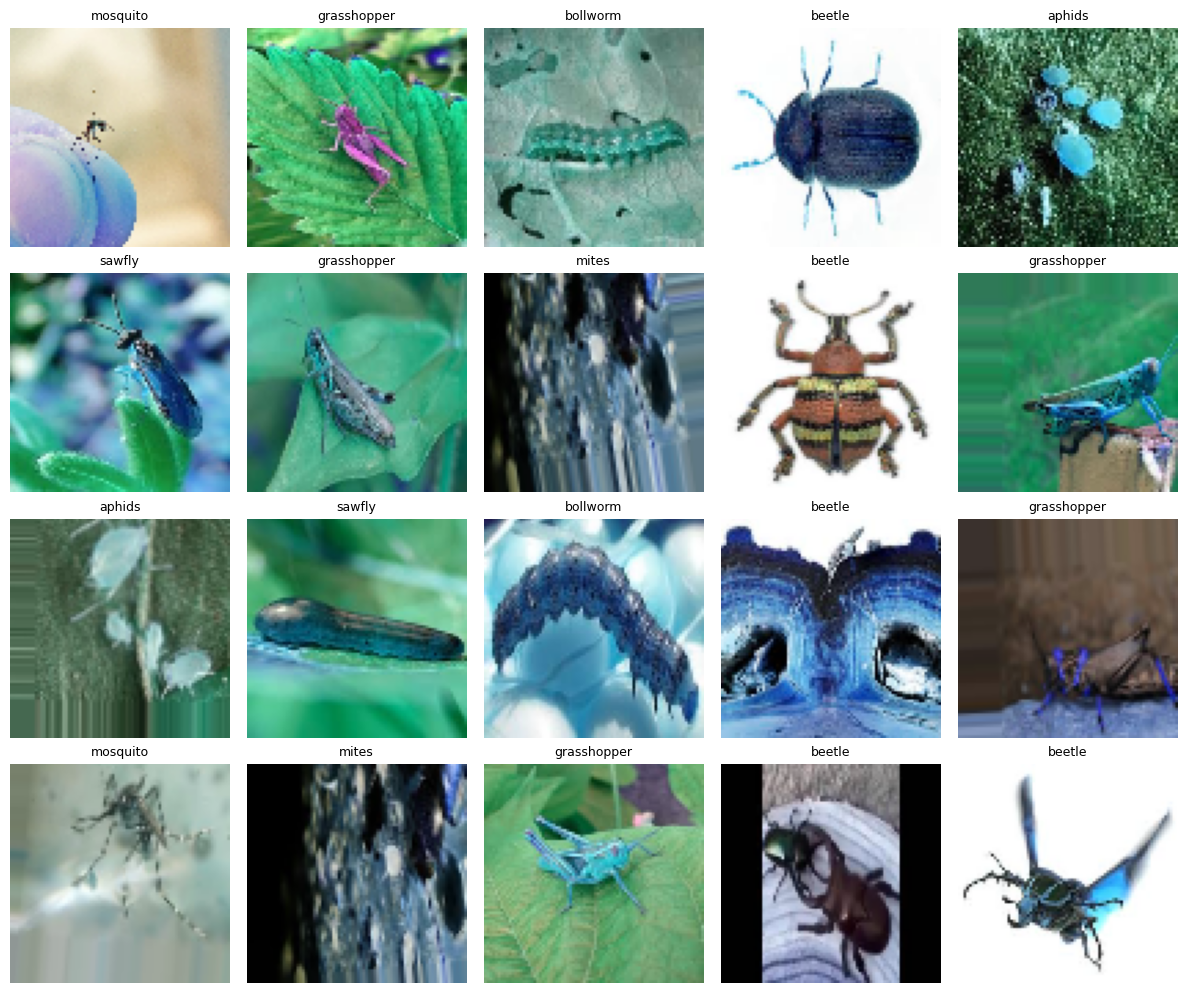

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Use your loaded image data and labels
data = images_data
all_labels = labels  # Make sure this matches your earlier label list

# Select 20 random indices to use as a sample
indices = np.random.randint(0, len(data), 20)

sample_images = data[indices]

# Set up a 4x5 grid for plotting
fig = plt.figure(figsize=(12, 10))

# Loop through selected sample images
for i, img in enumerate(sample_images):
    plt.subplot(4, 5, i + 1)
    plt.imshow(img.astype(np.uint8))  # Ensure images are shown properly
    plt.axis('off')
    plt.title(all_labels[indices[i]], fontsize=9)

plt.tight_layout()
plt.show()


## Model Building

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Define parameters
num_classes = 9   #  9 insect classes
input_size = 80   # resized image dimensions

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the CNN model
model_fcn = Sequential([
    # Normalize pixel values between 0 and 1
    tf.keras.layers.Rescaling(1./255, input_shape=(input_size, input_size, 3)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  #  9-class output
])


In [ ]:
model_fcn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
model_fcn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 80, 80, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 78, 78, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,152,585 (4.40 MB)

 Trainable params: 1,152,585 (4.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import time

# Define number of epochs
epochs = 20

# Track training time
print("\nTraining FCN model on insect dataset...")
start_time = time.time()

# Train the model on insect dataset
history_fcn = model_fcn.fit(
    X_train,               # Insect training images
    y_train_one_hot,       # One-hot encoded labels for 9 classes
    batch_size=32,
    epochs=epochs,
    validation_split=0.2   # 20% of training data used for validation
)

end_time = time.time()
print(f"Training time for FCN model: {end_time - start_time:.2f} seconds")

# Save the trained model
model_fcn.save('insect_model_fcn.h5')



Training FCN model on insect dataset...
Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.1470 - loss: 2.1871 - val_accuracy: 0.2670 - val_loss: 2.0270
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2970 - loss: 1.9085 - val_accuracy: 0.3536 - val_loss: 1.8322
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4235 - loss: 1.6106 - val_accuracy: 0.4751 - val_loss: 1.5127
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4970 - loss: 1.3930 - val_accuracy: 0.5396 - val_loss: 1.3627
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6049 - loss: 1.1299 - val_accuracy: 0.5948 - val_loss: 1.2009
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7266 - loss: 0.8282 - val_accuracy: 0.6869 - val_loss: 0.9711
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8270 - loss: 0.5446 - val_accuracy: 0.6796 - val_loss: 1.1104
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8411 - loss

Training time for FCN model: 27.14 seconds


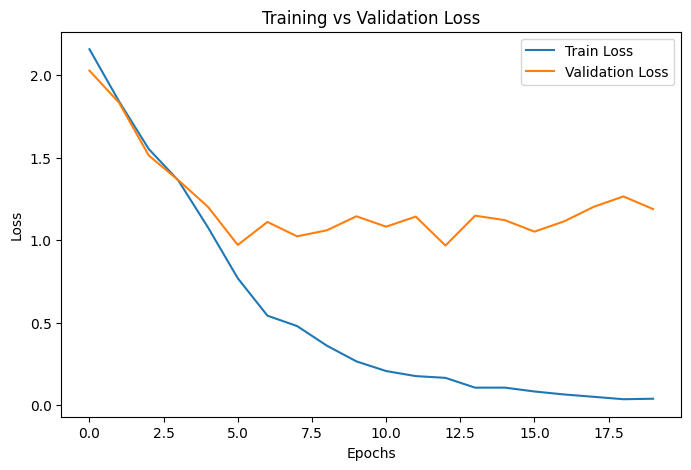

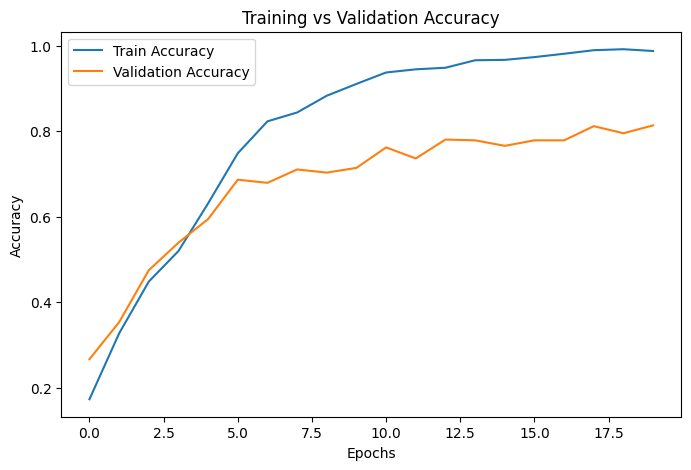

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history_fcn.history['loss'], label='Train Loss')
plt.plot(history_fcn.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('LossVal_loss.png')  # Save before showing
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_fcn.history['accuracy'], label='Train Accuracy')
plt.plot(history_fcn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('AccVal_acc.png')  # Save before showing
plt.show()


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
 Accuracy: 0.8276877761413843

 Confusion Matrix:
[[65  2  0  4  2  0  0  0  0]
 [ 7 51  0  1  2  2  1  0  1]
 [ 1  3 86  1  2  2  1  5  3]
 [ 5  2  0 73  0  0  0  2  2]
 [ 7  3  1  2 64  1  2  0  3]
 [ 4  0  0  0  5 64  1  0  0]
 [ 2  0  1  0  3  0 70  3  0]
 [ 3  3  1  3  1  1  1 46  1]
 [ 3  1  0  3  4  0  0  3 43]]


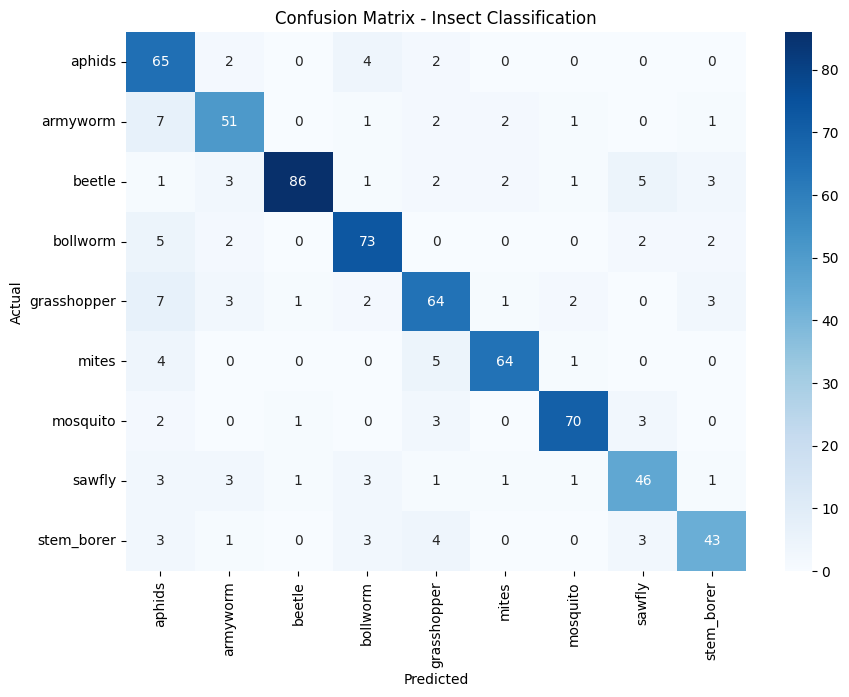


📝 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76        73
           1       0.78      0.78      0.78        65
           2       0.97      0.83      0.89       104
           3       0.84      0.87      0.85        84
           4       0.77      0.77      0.77        83
           5       0.91      0.86      0.89        74
           6       0.92      0.89      0.90        79
           7       0.78      0.77      0.77        60
           8       0.81      0.75      0.78        57

    accuracy                           0.83       679
   macro avg       0.83      0.82      0.82       679
weighted avg       0.84      0.83      0.83       679

 Accuracy Score: 0.8276877761413843
 F1 Score (Weighted): 0.8296164550134806


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Get predicted probabilities for test set
y_pred = model_fcn.predict(X_test)

# Get predicted classes by taking argmax of predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Accuracy score
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(" Accuracy:", accuracy)

# Confusion Matrix
print("\n Confusion Matrix:")
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(cm)

# Show Confusion Matrix with class labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,  # Using label encoder's classes for x-axis
            yticklabels=le.classes_)  # Using label encoder's classes for y-axis
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Insect Classification")
plt.show()

# Classification Report
print("\n📝 Classification Report:")
# Ensure le.classes_ corresponds to the class labels of your insect classification
print(classification_report(y_true_classes, y_pred_classes,))

# Additional metrics
print(" Accuracy Score:", accuracy_score(y_true_classes, y_pred_classes))
print(" F1 Score (Weighted):", f1_score(y_true_classes, y_pred_classes, average='weighted'))



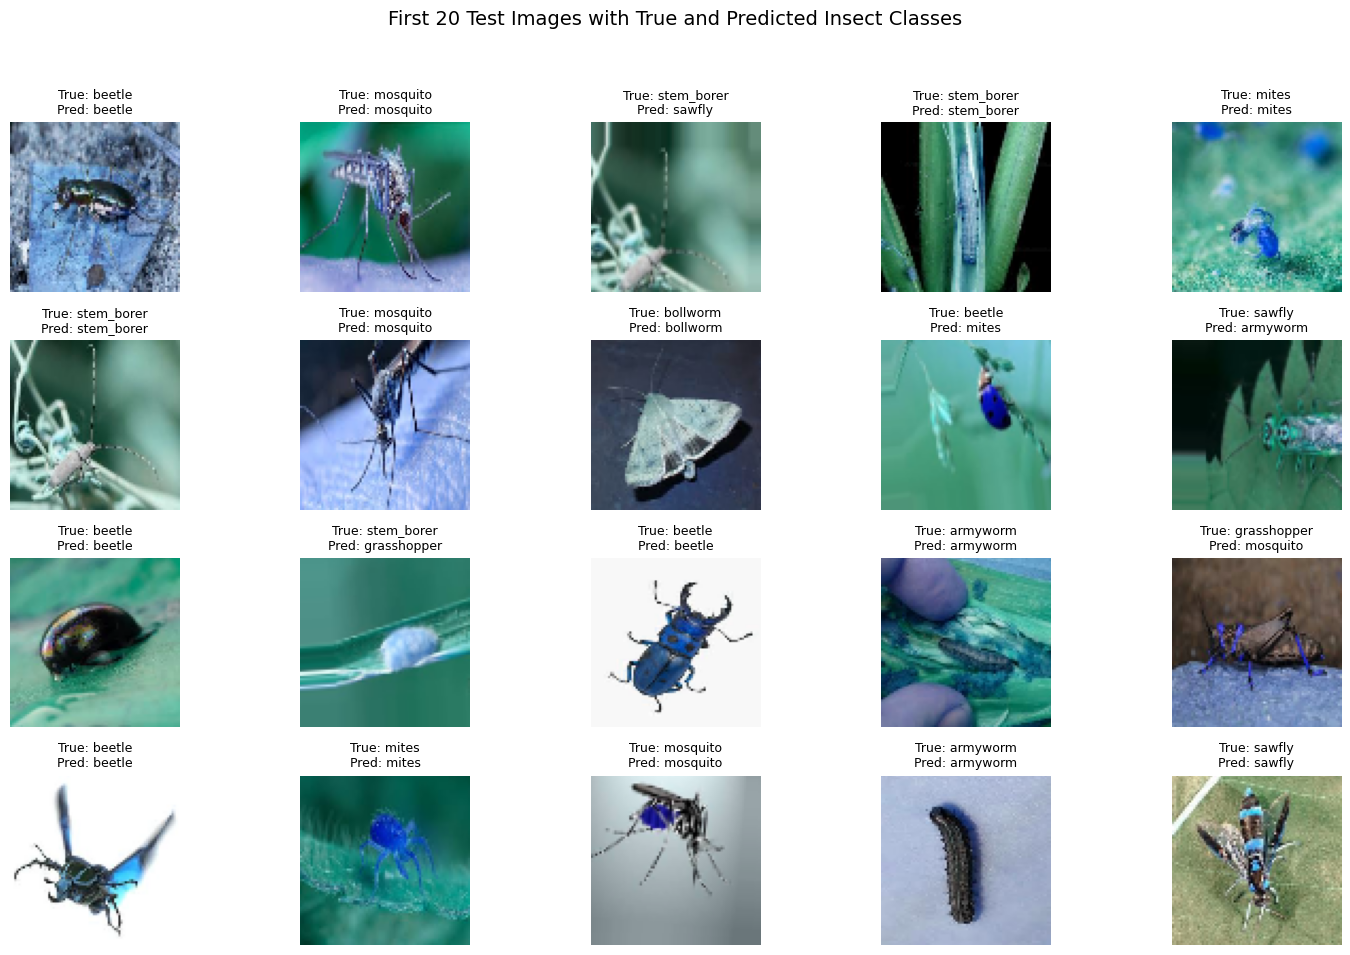

In [ ]:
import matplotlib.pyplot as plt

# Number of test images to visualize
num_images = 20

# Get class names using inverse_transform
true_labels = le.inverse_transform(y_true_classes)
pred_labels = le.inverse_transform(y_pred_classes)

plt.figure(figsize=(15, 10))

# Loop through the first num_images in the test set
for i in range(num_images):
    plt.subplot(4, 5, i + 1)
    plt.imshow((X_test[i]).astype(np.uint8))  # X_test is normalized
    plt.axis('off')

    # Use actual class names in the title
    title = f"True: {true_labels[i]}\nPred: {pred_labels[i]}"
    plt.title(title, fontsize=9)

plt.suptitle("First 20 Test Images with True and Predicted Insect Classes", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Build Deep Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Parameters
num_classes = 9  # Updated for 9 insect classes
input_size = 80  # Assuming 80x80 images

# Set seed for reproducibility
tf.random.set_seed(42)

# Deeper CNN model for insect classification
model_insect_deep = Sequential([
    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(input_size, input_size, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Fully connected layers
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Final layer for 9-class classification
])


In [ ]:
import time

import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint




# Compile the model with SGD optimizer
model_insect_deep.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model_insect_deep.summary()

# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'best_model.h5',         # file name to save the model
    monitor='val_accuracy',  # metric to monitor
    save_best_only=True,     # only save the best model
    mode='max',
    verbose=1
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 80, 80, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 80, 80, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 80, 80, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 80, 80, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 40, 40, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 40, 40, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 40, 40, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,89

 Total params: 3,599,913 (13.73 MB)

 Trainable params: 3,599,017 (13.73 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
import time
start_time = time.time()
history = model_insect_deep.fit(

    X_train, y_train_one_hot,
    epochs=epochs,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)
# End tracking time
end_time0 = time.time()
print(f"Training time for Deep Insect Model: {end_time0 - start_time:.2f} seconds")


Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.1261 - loss: 4.4334
Epoch 1: val_accuracy improved from -inf to 0.15470, saving model to best_model.h5


68/68 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.1261 - loss: 4.4222 - val_accuracy: 0.1547 - val_loss: 2.8593
Epoch 2/20
66/68 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1570 - loss: 2.9016
Epoch 2: val_accuracy improved from 0.15470 to 0.19890, saving model to best_model.h5


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.1574 - loss: 2.9007 - val_accuracy: 0.1989 - val_loss: 2.7704
Epoch 3/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2027 - loss: 2.7990
Epoch 3: val_accuracy improved from 0.19890 to 0.28177, saving model to best_model.h5


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2027 - loss: 2.7988 - val_accuracy: 0.2818 - val_loss: 2.6803
Epoch 4/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2167 - loss: 2.7487
Epoch 4: val_accuracy improved from 0.28177 to 0.34070, saving model to best_model.h5


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2172 - loss: 2.7486 - val_accuracy: 0.3407 - val_loss: 2.5567
Epoch 5/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2586 - loss: 2.6854
Epoch 5: val_accuracy improved from 0.34070 to 0.35359, saving model to best_model.h5


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.2588 - loss: 2.6846 - val_accuracy: 0.3536 - val_loss: 2.4377
Epoch 6/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3211 - loss: 2.5744
Epoch 6: val_accuracy improved from 0.35359 to 0.39595, saving model to best_model.h5


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3210 - loss: 2.5742 - val_accuracy: 0.3959 - val_loss: 2.4170
Epoch 7/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3329 - loss: 2.5022
Epoch 7: val_accuracy did not improve from 0.39595
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3333 - loss: 2.5017 - val_accuracy: 0.3517 - val_loss: 2.5087
Epoch 8/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3672 - loss: 2.4245
Epoch 8: val_accuracy improved from 0.39595 to 0.46409, saving model to best_model.h5


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3672 - loss: 2.4245 - val_accuracy: 0.4641 - val_loss: 2.2753
Epoch 9/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3640 - loss: 2.4092
Epoch 9: val_accuracy did not improve from 0.46409
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3644 - loss: 2.4090 - val_accuracy: 0.3996 - val_loss: 2.4301
Epoch 10/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4178 - loss: 2.3222
Epoch 10: val_accuracy improved from 0.46409 to 0.47145, saving model to best_model.h5


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.4181 - loss: 2.3212 - val_accuracy: 0.4715 - val_loss: 2.1796
Epoch 11/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4401 - loss: 2.2600
Epoch 11: val_accuracy improved from 0.47145 to 0.51381, saving model to best_model.h5


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4402 - loss: 2.2599 - val_accuracy: 0.5138 - val_loss: 2.1134
Epoch 12/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4614 - loss: 2.2031
Epoch 12: val_accuracy did not improve from 0.51381
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4617 - loss: 2.2024 - val_accuracy: 0.4715 - val_loss: 2.3321
Epoch 13/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4671 - loss: 2.1344
Epoch 13: val_accuracy improved from 0.51381 to 0.55433, saving model to best_model.h5


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4675 - loss: 2.1339 - val_accuracy: 0.5543 - val_loss: 2.0429
Epoch 14/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4719 - loss: 2.1189
Epoch 14: val_accuracy did not improve from 0.55433
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4725 - loss: 2.1182 - val_accuracy: 0.5451 - val_loss: 2.0218
Epoch 15/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5349 - loss: 2.0056
Epoch 15: val_accuracy improved from 0.55433 to 0.58748, saving model to best_model.h5


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5351 - loss: 2.0053 - val_accuracy: 0.5875 - val_loss: 1.9148
Epoch 16/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5470 - loss: 1.9573
Epoch 16: val_accuracy improved from 0.58748 to 0.61694, saving model to best_model.h5


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5469 - loss: 1.9569 - val_accuracy: 0.6169 - val_loss: 1.8891
Epoch 17/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5760 - loss: 1.8510
Epoch 17: val_accuracy did not improve from 0.61694
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5758 - loss: 1.8514 - val_accuracy: 0.5635 - val_loss: 2.1800
Epoch 18/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5733 - loss: 1.8634
Epoch 18: val_accuracy improved from 0.61694 to 0.62799, saving model to best_model.h5


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5738 - loss: 1.8622 - val_accuracy: 0.6280 - val_loss: 1.8153
Epoch 19/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5963 - loss: 1.7802
Epoch 19: val_accuracy improved from 0.62799 to 0.67403, saving model to best_model.h5


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5966 - loss: 1.7795 - val_accuracy: 0.6740 - val_loss: 1.6748
Epoch 20/20
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6262 - loss: 1.6819
Epoch 20: val_accuracy improved from 0.67403 to 0.68140, saving model to best_model.h5


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6262 - loss: 1.6823 - val_accuracy: 0.6814 - val_loss: 1.7317
Restoring model weights from the end of the best epoch: 19.
Training time for Deep Insect Model: 62.29 seconds


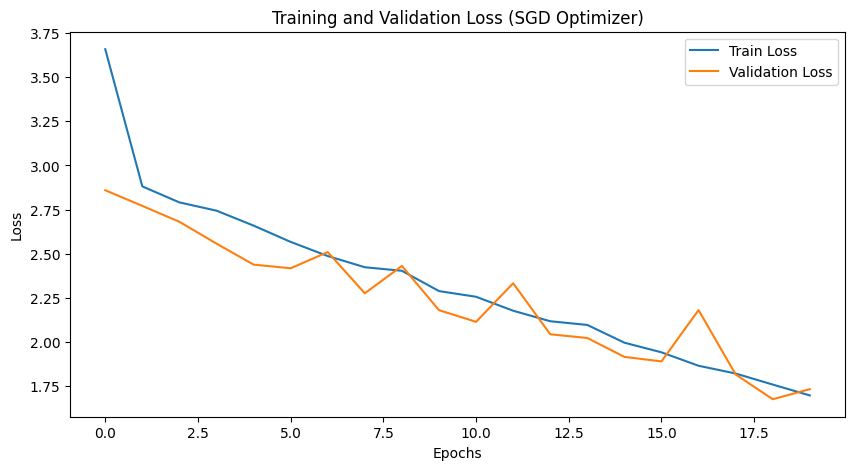

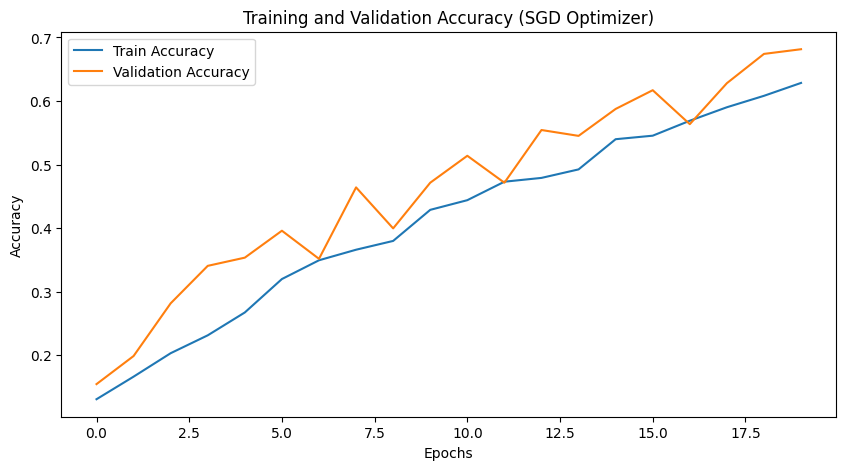

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (SGD Optimizer)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('sgd_train_validation_loss.png')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (SGD Optimizer)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('sgd_train_validation_accuracy.png')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Class names for insect classification
class_names = ['sawfly', 'aphids', 'armyworm', 'mites', 'beetle', 'mosquito', 'stem_borer', 'grasshopper', 'bollworm']

# Generate predictions for the test dataset
y_pred = model_insect_deep.predict(X_test)

# Get predicted classes by taking argmax of predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Calculate the accuracy of the model
accuracy_s = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy_s)

# Confusion matrix with class names
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("\nConfusion matrix:")
print(conf_matrix)

# Print the classification report with class names
print("\nClassification report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Print the accuracy and F1-score
print("\nAccuracy score:", accuracy_score(y_true_classes, y_pred_classes))
print("F1 score:", f1_score(y_true_classes, y_pred_classes, average='weighted'))


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step
Accuracy: 0.6656848306332842

Confusion matrix:
[[52  4  0  5  1  2  6  2  1]
 [ 5 24  5  1  7  6  7  1  9]
 [ 1  6 76  0  3  4  5  8  1]
 [ 4  1  1 64  2  9  1  2  0]
 [ 4  6  1  2 49  9 11  1  0]
 [ 1  0  1  0  6 62  2  1  1]
 [ 0  0  1  2  0  2 71  3  0]
 [ 3  1  7  6  5  4  2 32  0]
 [ 3  3  3  7  5  7  4  3 22]]

Classification report:
              precision    recall  f1-score   support

      sawfly       0.71      0.71      0.71        73
      aphids       0.53      0.37      0.44        65
    armyworm       0.80      0.73      0.76       104
       mites       0.74      0.76      0.75        84
      beetle       0.63      0.59      0.61        83
    mosquito       0.59      0.84      0.69        74
  stem_borer       0.65      0.90      0.76        79
 grasshopper       0.60      0.53      0.57        60
    bollworm       0.65      0.39      0.48        57

    accuracy                           0.67       679
   macro avg       0.

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model_insect_deep.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model_insect_deep.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 80, 80, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 80, 80, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 80, 80, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 80, 80, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 40, 40, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 40, 40, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 40, 40, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,89

 Total params: 3,599,913 (13.73 MB)

 Trainable params: 3,599,017 (13.73 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
epochs = 25
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model checkpoint to save the best weights only
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

start_time2 = time.time()
# Train the model
history_cnn_deep = model_insect_deep.fit(

    X_train, y_train_one_hot,
    epochs=epochs,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, checkpoint]
)
end_time2 = time.time()
print(f"Training time for Deep Insect Model: {end_time2 - start_time2:.2f} seconds")
# Save the final full model
model_insect_deep.save('model_deep_full_adam.keras')

Epoch 1/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - accuracy: 0.4168 - loss: 2.4780 - val_accuracy: 0.4401 - val_loss: 2.2917
Epoch 2/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3727 - loss: 2.4330 - val_accuracy: 0.3591 - val_loss: 2.4249
Epoch 3/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3995 - loss: 2.3401 - val_accuracy: 0.4770 - val_loss: 2.1543
Epoch 4/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4706 - loss: 2.1829 - val_accuracy: 0.5046 - val_loss: 2.0706
Epoch 5/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4865 - loss: 2.0861 - val_accuracy: 0.5506 - val_loss: 1.9919
Epoch 6/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5370 - loss: 1.9978 - val_accuracy: 0.5912 - val_loss: 1.8569
Epoch 7/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5762 - loss: 1.8592 - val_accuracy: 0.6077 - val_loss: 1.8379
Epoch 8/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6174 - loss: 1.7510 - val_accuracy: 0.6317 -

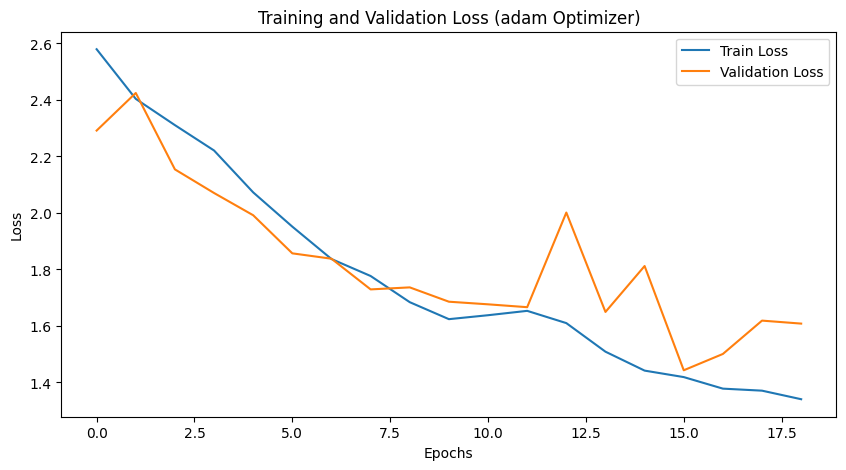

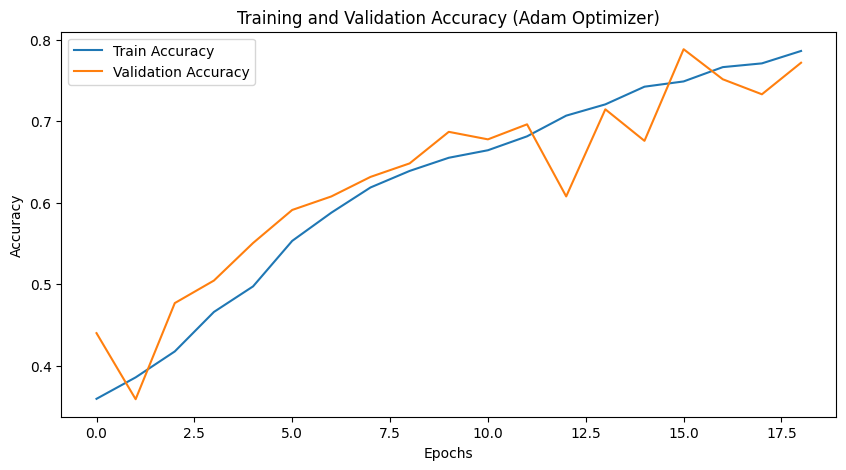

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_cnn_deep.history['loss'], label='Train Loss')
plt.plot(history_cnn_deep.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (adam Optimizer)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('sgd_train_validation_loss.png')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_cnn_deep.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_deep.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Adam Optimizer)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('sgd_train_validation_accuracy.png')
plt.show()


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step
Accuracy: 0.8276877761413843

Confusion Matrix:
[[56  1  0 10  4  0  0  2  0]
 [ 6 36  0  8  9  2  0  3  1]
 [ 2  0 78  1  4  8  2  9  0]
 [ 1  1  1 74  3  1  0  2  1]
 [ 7  0  1  4 62  4  2  1  2]
 [ 1  0  3  2  1 64  1  1  1]
 [ 0  1  0  1  0  1 73  2  1]
 [ 0  1  5  4  8  1  1 37  3]
 [ 1  1  3 10  4  2  0  5 31]]


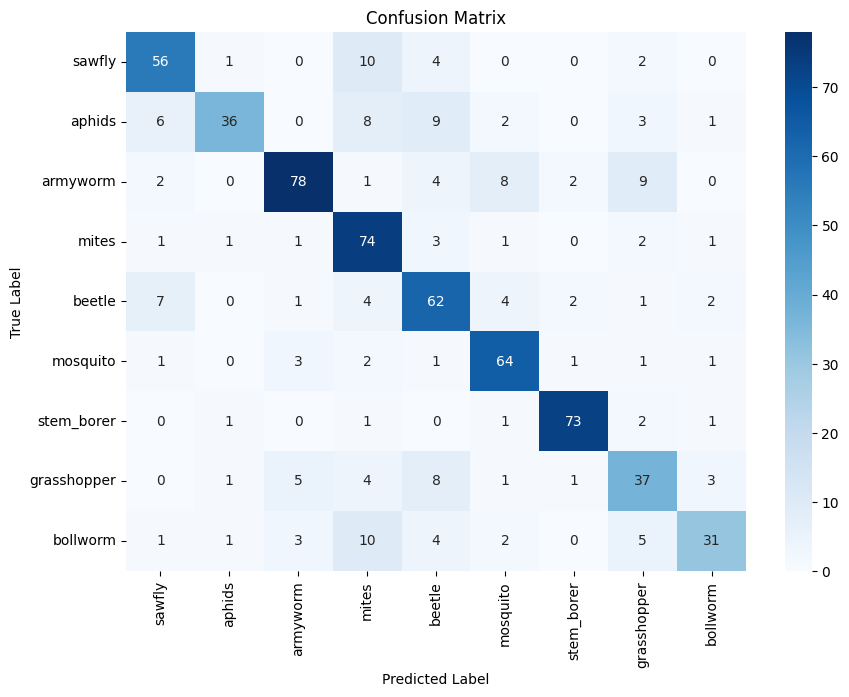


Classification Report:
              precision    recall  f1-score   support

      sawfly       0.76      0.77      0.76        73
      aphids       0.88      0.55      0.68        65
    armyworm       0.86      0.75      0.80       104
       mites       0.65      0.88      0.75        84
      beetle       0.65      0.75      0.70        83
    mosquito       0.77      0.86      0.82        74
  stem_borer       0.92      0.92      0.92        79
 grasshopper       0.60      0.62      0.61        60
    bollworm       0.78      0.54      0.64        57

    accuracy                           0.75       679
   macro avg       0.76      0.74      0.74       679
weighted avg       0.77      0.75      0.75       679


Accuracy Score: 0.8276877761413843
F1 Score (Weighted): 0.7507153711737985


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Class labels
class_names = ['sawfly', 'aphids', 'armyworm', 'mites', 'beetle', 'mosquito', 'stem_borer', 'grasshopper', 'bollworm']

# Generate predictions for the test dataset
y_pred = model_insect_deep.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Calculate accuracy
accuracy_a = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("\nConfusion Matrix:")
print(cm)

# Optional: Plot confusion matrix as heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification report with class names
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Print Accuracy and F1 score
print("\nAccuracy Score:", accuracy)
print("F1 Score (Weighted):", f1_score(y_true_classes, y_pred_classes, average='weighted'))


## FIne Tune Model

In [ ]:
IMG_WIDTH_TL = 224
IMG_HEIGHT_TL = 224

In [ ]:
print(f"\n--- Creating Data Generators for Transfer Learning (Input: {IMG_HEIGHT_TL}x{IMG_WIDTH_TL}) ---")


--- Creating Data Generators for Transfer Learning (Input: 224x224) ---


In [ ]:
train_datagen_tl = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

In [ ]:
# For validation and testing: only MobileNetV2 preprocessing
validation_datagen_tl = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Define the directory paths and parameters for transfer learning
TRAIN_DIR = "/content/Assignment Part I/Insect Classification/train"
TEST_DIR = "/content/Assignment Part I/Insect Classification/test"
BATCH_SIZE = 32
NUM_CLASSES = 9
EPOCHS_TRANSFER = 20 # Example value, adjust as needed


train_generator_tl = train_datagen_tl.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT_TL, IMG_WIDTH_TL),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',  # Use 80% for training
    shuffle=True
)


Found 1692 images belonging to 9 classes.


In [ ]:
validation_generator_tl = train_datagen_tl.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT_TL, IMG_WIDTH_TL),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',  # Use 20% for validation
    shuffle=False
)
# Define the test dataset path
TEST_DIR = "/content/Assignment Part I/Insect Classification/test"


test_generator_tl = validation_datagen_tl.flow_from_directory( # Use validation_datagen_tl for test
    TEST_DIR,
    target_size=(IMG_HEIGHT_TL, IMG_WIDTH_TL),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)
# Verify class indices for TL generator if needed, should be same
print("Class Indices from TL Training Generator:", train_generator_tl.class_indices)

Found 419 images belonging to 9 classes.
Found 384 images belonging to 9 classes.
Class Indices from TL Training Generator: {'aphids': 0, 'armyworm': 1, 'beetle': 2, 'bollworm': 3, 'grasshopper': 4, 'mites': 5, 'mosquito': 6, 'sawfly': 7, 'stem_borer': 8}


In [ ]:
# Add this cell before creating the test_generator_tl
import os
from PIL import Image

# Base dataset path for the test data
dataset_path_test = "/content/Assignment Part I/Insect Classification/test"

# Track corrupted image paths in the test directory
corrupted_images_test = []

print(f"\n--- Checking Test Directory ({dataset_path_test}) for Corrupted Images ---")

# Loop through each class folder in the test directory
if os.path.exists(dataset_path_test):
    for class_name in os.listdir(dataset_path_test):
        class_dir = os.path.join(dataset_path_test, class_name)
        if os.path.isdir(class_dir):
            for file in os.listdir(class_dir):
                file_path = os.path.join(class_dir, file)
                try:
                    # Try to open and load the image
                    with Image.open(file_path) as img:
                        img.verify()  # Verify image file integrity
                except Exception as e:
                    print(f" Corrupted: {file_path} ({e})")
                    corrupted_images_test.append(file_path)

    # Delete corrupted images in the test directory
    print(f"\n--- Deleting Corrupted Images from Test Directory ({dataset_path_test}) ---")
    for image_path in corrupted_images_test:
        try:
            os.remove(image_path)
            print(f" Removed: {image_path}")
        except Exception as e:
            print(f" Error removing {image_path}: {e}")

    print(f"\n Done checking and removing corrupted images from test directory. Total removed: {len(corrupted_images_test)}")
else:
    print(f"Test directory not found at: {dataset_path_test}")


# Now, re-create the test_generator_tl after cleaning the test directory
print(f"\n--- Creating Test Data Generator for Transfer Learning (Input: {IMG_HEIGHT_TL}x{IMG_WIDTH_TL}) ---")
test_generator_tl = validation_datagen_tl.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT_TL, IMG_WIDTH_TL),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


--- Checking Test Directory (/content/Assignment Part I/Insect Classification/test) for Corrupted Images ---

--- Deleting Corrupted Images from Test Directory (/content/Assignment Part I/Insect Classification/test) ---

 Done checking and removing corrupted images from test directory. Total removed: 0

--- Creating Test Data Generator for Transfer Learning (Input: 224x224) ---
Found 384 images belonging to 9 classes.


In [ ]:
def create_transfer_learning_model(input_shape=(IMG_HEIGHT_TL, IMG_WIDTH_TL, 3), num_classes=NUM_CLASSES):
    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False, # Remove ImageNet classifier
                                                   weights='imagenet')
    # Freeze the base model initially
    base_model.trainable = False

    # Add custom classifier on top
    model = Sequential([
        base_model,
        layers.GlobalAveragePooling2D(), # Efficient alternative to Flatten
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model, base_model

In [ ]:
print("\n--- Transfer Learning Model (MobileNetV2) ---")
transfer_model, base_transfer_model = create_transfer_learning_model()
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
transfer_model.summary()


--- Transfer Learning Model (MobileNetV2) ---
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,588,233 (9.87 MB)

 Trainable params: 330,249 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# 1. Feature Extraction (train only the top layers)
print("\nTraining Transfer Learning Model (Feature Extraction)...")
early_stopping_tl_feature = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1) # Shorter patience
checkpoint_tl_feature = ModelCheckpoint('transfer_model_feature_extraction_best.keras', save_best_only=True, monitor='val_loss')


Training Transfer Learning Model (Feature Extraction)...


In [ ]:
start_time1 = time.time()
history_tl_feature_extraction = transfer_model.fit(

    train_generator_tl,
    epochs=EPOCHS_TRANSFER, # Fewer epochs for feature extraction
    validation_data=validation_generator_tl,
    callbacks=[early_stopping_tl_feature, checkpoint_tl_feature]
)
end_time1 = time.time()
print(f"Training time for fine tuned Insect Model: {end_time1 - start_time1:.2f} seconds")

Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 50s 755ms/step - accuracy: 0.4315 - loss: 1.7776 - val_accuracy: 0.7351 - val_loss: 0.8313
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 542ms/step - accuracy: 0.8045 - loss: 0.6002 - val_accuracy: 0.7279 - val_loss: 0.7373
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 525ms/step - accuracy: 0.8840 - loss: 0.3771 - val_accuracy: 0.7446 - val_loss: 0.7589
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 32s 599ms/step - accuracy: 0.9105 - loss: 0.2550 - val_accuracy: 0.7709 - val_loss: 0.7647
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 522ms/step - accuracy: 0.9401 - loss: 0.1971 - val_accuracy: 0.7637 - val_loss: 0.7653
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 531ms/step - accuracy: 0.9618 - loss: 0.1510 - val_accuracy: 0.7232 - val_loss: 0.9106
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 536ms/step - accuracy: 0.9619 - loss: 0.1526 - val_accuracy: 0.7661 - val_loss: 0.8157
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.
Training time 

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history, title):
    """
    Plots the training and validation accuracy and loss from a Keras History object.

    Args:
        history: The Keras History object returned by the model.fit() method.
        title (str): A title for the plots.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'{title} - Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'{title} - Training and Validation Loss')
    plt.show()

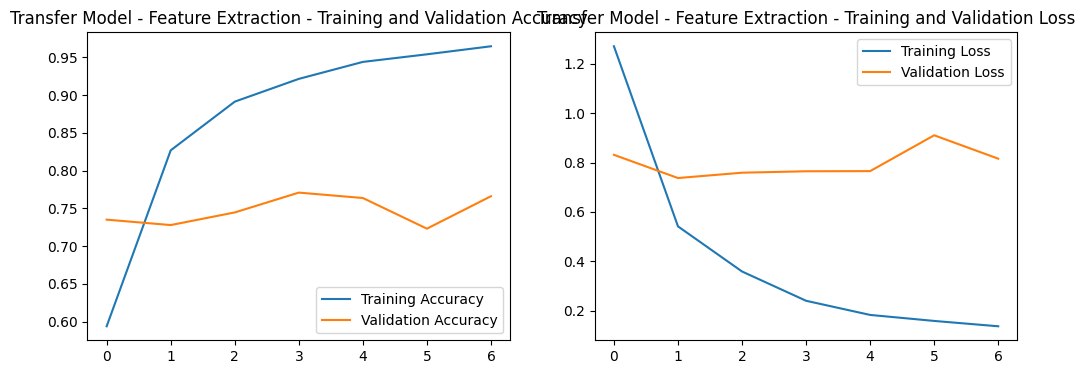

In [ ]:
plot_training_history(history_tl_feature_extraction, "Transfer Model - Feature Extraction")

In [ ]:
print("Loading best weights for transfer model after feature extraction...")
transfer_model.load_weights('transfer_model_feature_extraction_best.keras')

Loading best weights for transfer model after feature extraction...


In [ ]:
# 2. Fine-Tuning (unfreeze some layers of the base model)
print("\nFine-tuning Transfer Learning Model...")
base_transfer_model.trainable = True # Unfreeze the base model

# Fine-tune from a certain layer onwards. For MobileNetV2, let's say last 30 layers.
# Check base_transfer_model.layers to see layer names and choose appropriately.
fine_tune_at = len(base_transfer_model.layers) - 30 # Example: unfreeze last 30 layers
for layer in base_transfer_model.layers[:fine_tune_at]:
    layer.trainable = False
for layer in base_transfer_model.layers[fine_tune_at:]:
    print(f"Layer {layer.name} is trainable: {layer.trainable}")


Fine-tuning Transfer Learning Model...
Layer block_13_project_BN is trainable: True
Layer block_14_expand is trainable: True
Layer block_14_expand_BN is trainable: True
Layer block_14_expand_relu is trainable: True
Layer block_14_depthwise is trainable: True
Layer block_14_depthwise_BN is trainable: True
Layer block_14_depthwise_relu is trainable: True
Layer block_14_project is trainable: True
Layer block_14_project_BN is trainable: True
Layer block_14_add is trainable: True
Layer block_15_expand is trainable: True
Layer block_15_expand_BN is trainable: True
Layer block_15_expand_relu is trainable: True
Layer block_15_depthwise is trainable: True
Layer block_15_depthwise_BN is trainable: True
Layer block_15_depthwise_relu is trainable: True
Layer block_15_project is trainable: True
Layer block_15_project_BN is trainable: True
Layer block_15_add is trainable: True
Layer block_16_expand is trainable: True
Layer block_16_expand_BN is trainable: True
Layer block_16_expand_relu is trainabl

In [ ]:
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), # Much lower LR
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
transfer_model.summary() # See trainable params change

early_stopping_tl_finetune = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
checkpoint_tl_finetune = ModelCheckpoint('transfer_model_finetuned_best.keras', save_best_only=True, monitor='val_loss')

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,588,233 (9.87 MB)

 Trainable params: 1,856,649 (7.08 MB)

 Non-trainable params: 731,584 (2.79 MB)

Epoch 8/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 56s 759ms/step - accuracy: 0.7328 - loss: 0.8340 - val_accuracy: 0.7351 - val_loss: 0.7235
Epoch 9/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 533ms/step - accuracy: 0.8122 - loss: 0.6082 - val_accuracy: 0.7661 - val_loss: 0.7643
Epoch 10/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 532ms/step - accuracy: 0.8464 - loss: 0.4983 - val_accuracy: 0.7542 - val_loss: 0.7768
Epoch 11/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 534ms/step - accuracy: 0.8761 - loss: 0.4375 - val_accuracy: 0.7637 - val_loss: 0.7324
Epoch 12/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 542ms/step - accuracy: 0.8968 - loss: 0.3788 - val_accuracy: 0.7661 - val_loss: 0.7754
Epoch 13/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 532ms/step - accuracy: 0.8958 - loss: 0.3553 - val_accuracy: 0.7422 - val_loss: 0.7433
Epoch 14/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 542ms/step - accuracy: 0.9138 - loss: 0.3065 - val_accuracy: 0.7876 - val_loss: 0.6735
Epoch 15/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 636ms/step - accuracy: 0.9172 - loss: 0.2978 - va

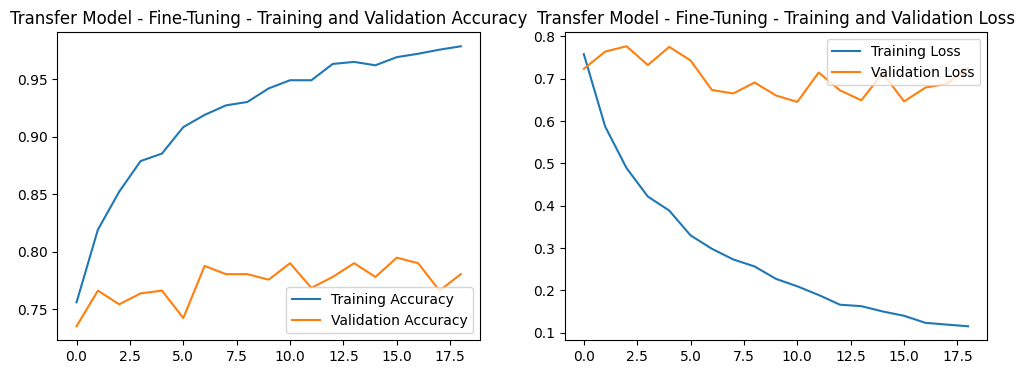

In [ ]:
# Continue training (fine-tuning)
history_tl_fine_tuning = transfer_model.fit(
    train_generator_tl,
    epochs=EPOCHS_TRANSFER + 15, # More epochs for fine-tuning, can be EPOCHS_DEEPER
    initial_epoch=history_tl_feature_extraction.epoch[-1] +1, # Continue from where feature extraction left off
    validation_data=validation_generator_tl,
    callbacks=[early_stopping_tl_finetune, checkpoint_tl_finetune]
)
end_time1 = time.time()
print(f"Training time for Deep Insect Model: {end_time1 - start_time1:.2f} seconds")
plot_training_history(history_tl_fine_tuning, "Transfer Model - Fine-Tuning")

In [ ]:
def evaluate_model_custom(model, test_data, model_name="Model", class_names_for_report=None):
    print(f"\n--- Evaluating {model_name} ---")
    if test_data is None:
        print(f"Test data for {model_name} is not available. Skipping evaluation.")
        return 0.0, 0.0 # Return dummy values

    loss, accuracy = model.evaluate(test_data, verbose=1)
    print(f"{model_name} Test Accuracy: {accuracy*100:.2f}%")
    print(f"{model_name} Test Loss: {loss:.4f}")

    Y_pred_probs = model.predict(test_data)
    Y_pred_classes = np.argmax(Y_pred_probs, axis=1)

    # Get true labels
    if isinstance(test_data, tf.data.Dataset):
        Y_true = np.concatenate([y for x, y in test_data], axis=0)
        Y_true = np.argmax(Y_true, axis=1) # Convert from one-hot if needed
    elif hasattr(test_data, 'classes'): # For ImageDataGenerator
        Y_true = test_data.classes
    else:
        print("Could not determine true labels from test_data type.")
        return accuracy, loss

    print("\nClassification Report:")
    if class_names_for_report:
        print(classification_report(Y_true, Y_pred_classes, target_names=class_names_for_report, zero_division=0))
    else:
        print("Warning: class_names_for_report not provided for classification_report.")
        print(classification_report(Y_true, Y_pred_classes, zero_division=0))



    return accuracy, loss

In [ ]:
print("Loading best weights for transfer model after fine-tuning...")
transfer_model.load_weights('transfer_model_finetuned_best.keras')
transfer_accuracy, transfer_loss = evaluate_model_custom(transfer_model, test_generator_tl, "Transfer Learning Model (Fine-Tuned)")

Loading best weights for transfer model after fine-tuning...

--- Evaluating Transfer Learning Model (Fine-Tuned) ---
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9247 - loss: 0.2041
Transfer Learning Model (Fine-Tuned) Test Accuracy: 92.71%
Transfer Learning Model (Fine-Tuned) Test Loss: 0.2353
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        44
           1       0.89      0.91      0.90        43
           2       0.96      1.00      0.98        50
           3       0.86      0.86      0.86        36
           4       0.98      1.00      0.99        46
           5       0.97      0.88      0.93        42
           6       0.93      1.00      0.96        50
           7       1.00      0.86      0.93        37
           8       0.97      0.86      0.91        36

    accuracy                           0.93       384
   macro avg       0.93      0.92

In [ ]:
# prompt: Print only accuracy of 3 models , firsr baseline , deep model with sgd and adam and pre trained and fine tuned model . HUST accuracy

from sklearn.metrics import accuracy_score


print(f"Baseline Model Validation Accuracy (from history): {history_fcn.history['val_accuracy'][-1]:.4f}")

print(f"Deep Model with SGD Test Accuracy: {accuracy_s:.4f}") # This `accuracy` variable is from the last SGD evaluation


print(f"Deep Model with Adam Test Accuracy: {accuracy_a:.4f}") # This `accuracy` variable is from the last Adam evaluation


print(f"Pre-trained and Fine-tuned Model Test Accuracy: {transfer_accuracy:.4f}")


Baseline Model Validation Accuracy (from history): 0.8140
Deep Model with SGD Test Accuracy: 0.6657
Deep Model with Adam Test Accuracy: 0.7526
Pre-trained and Fine-tuned Model Test Accuracy: 0.9271
